# MNIST Handwritten Digit Classifier - Identify Number from Cropped Image

Given a dataset of 6,000 images of handwritten digits that have beeen cropped in half randomly, train a neural network to identify the number.

In [41]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [44]:
from numpy.random import randint

In [45]:
start_row = randint(0, 14)
start_col = randint(0, 14)

print(start_row)
print(start_col)

10
2


In [46]:
X_train = X_train[:, start_row:start_row+14, start_col:start_col+14]
X_test = X_test[:, start_row:start_row+14, start_col:start_col+14]

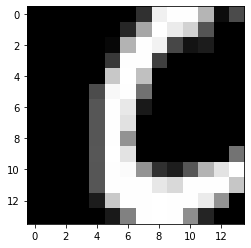

In [47]:
plt.imshow(X_train[1], cmap='gray')

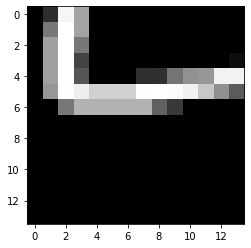

In [48]:
plt.imshow(X_train[2], cmap='gray')

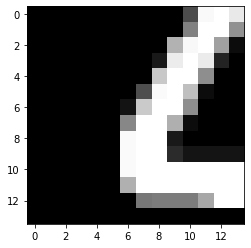

In [49]:
plt.imshow(X_test[1], cmap='gray')

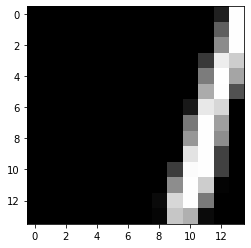

In [50]:
plt.imshow(X_test[2], cmap='gray')

In [53]:
image_height,image_width = 14, 14

X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 196)
(10000, 196)


In [54]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [55]:
model = Sequential()

In [56]:
model.add(Dense(512, activation='relu', input_shape=(196,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               100864    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 368,650
Trainable params: 368,650
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0669 - accuracy: 0.8781 - val_loss: 0.0440 - val_accuracy: 0.9228
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0399 - accuracy: 0.9264 - val_loss: 0.0381 - val_accuracy: 0.9290
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0338 - accuracy: 0.9378 - val_loss: 0.0370 - val_accuracy: 0.9322
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0291 - accuracy: 0.9460 - val_loss: 0.0363 - val_accuracy: 0.9332
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0259 - accuracy: 0.9527 - val_loss: 0.0332 - val_accuracy: 0.9390
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0230 - accuracy: 0.9574 - val_loss: 0.0347 - val_accuracy: 0.9387
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0206 - accuracy: 0.9617 - val_loss: 0.0330 - val_ac

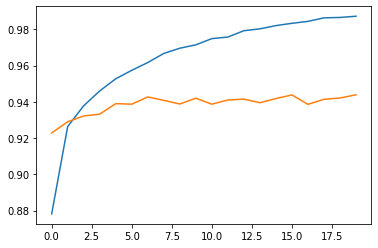

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

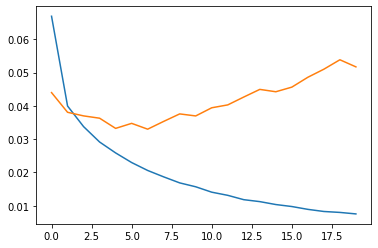

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [62]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.0517 - accuracy: 0.9439


[0.05169260874390602, 0.9438999891281128]